<a href="https://colab.research.google.com/github/mindyng/Projects/blob/master/Webflow_Initial_TechScreen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 3.5MB/s 


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from statsmodels.stats.outliers_influence import variance_inflation_factor

from datetime import datetime
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly import figure_factory as FF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## For Single csv file

# Byteboard Prompt: Production Optimization.

Reference file: https://docs.google.com/document/d/1-qmYa3O9CSHtQT8SxaRO0yamtT_-5olcgwJgXhcmXV4/edit

Using given csv files for widget creation and testing. Please do an analysis to optimize production from creation to testing.

Understanding Prompt:
1. Production optimization usually looks at minimizing: 

* Production Volume: Track the quantities that you are able to produce
* Production Downtime: Analyze and optimize your maintenance
* Production Costs: Monitor the costs implied in the production
* Overall Operations Effectiveness (OOE): Evaluate your operational efficiency
* Overall Equipment Effectiveness (OEE): Assess the scheduled efficiency
* Total Effective Equipment Performance (TEEP): Track overall effectiveness
* Capacity Utilization: Maximize the use of your capacities
* Defect Density: Track the damaged items right away
* Rate of Return: Measure how many items are sent back
* On-time Delivery: Ensure your products are delivered on time
* Right First Time: Understand the performance of your production process
* Asset Turnover: Acknowledge your assets in relation to your revenue
* Unit Costs: Track and optimize your units costs over time
* Return on Assets: See how profitable your business is relative to its assets
* Maintenance Costs: Evaluate your equipment costs in the long run
* Revenue Per Employee: Measure the success of your workforce

Given data, what can I analyze:

*  Production Volume
*  Operational Efficiency


Approach:

1. For Production Volume, see what is created and made to testing. Not all created widgets are made to testing (Assumption is that some widgets just are bad for some reason before testing occurs). So good to examine distribution of widgets created intially and those that make it to testing. Do percent of tested/created.

2. For Operational Efficiency, look at time from creation to test. See what the mean is as baseline. Then if there is left skew, look at what caused smaller time intervals. And optimize process for that.

In [ ]:
df = pd.read_csv('/content/sample_data/widgets_created.csv')
df.head()

,Unnamed: 0,uid,widget_type,created_ts
0,0,3fc760e3-afc7-4f3b-8b17-813de9ac3e7e,A,2018-06-01 06:05:49
1,1,86ba8559-fb1c-4178-b835-1dc8ad8be2a1,A,2018-06-01 06:11:47
2,2,76131121-b9ba-4d17-a600-374d5b46414a,A,2018-06-01 06:17:32
3,3,b74b4756-8837-450c-9dc1-d4a7d78e01ea,A,2018-06-01 06:23:36
4,4,d54e5b6b-1bcd-4c23-95c5-f5743497f1a3,A,2018-06-01 06:29:30


In [ ]:
df.shape

(32435, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32435 entries, 0 to 32434
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   32435 non-null  int64 
 1   uid          32435 non-null  object
 2   widget_type  32434 non-null  object
 3   created_ts   32434 non-null  object
dtypes: int64(1), object(3)
memory usage: 1013.7+ KB


In [ ]:
df.nunique()

Unnamed: 0     32435
uid            32435
widget_type        1
created_ts     32434
dtype: int64

## Production Volume Optimization

Based on preliminary examination of created df, see that only 1 Type of Widget produced: Type A and 48567 different ones are produced at majority different times. Time stamps are mostly unique but there seems to be a duplicate based on output of unique values in created_ts.

So there are a total of **48567** total Widget Type A produced. Let us now see how many are sent over to testing by doing an inner join between created and tested DF's. Assumption is that uid is primary key from created and foreign key in tested.

In [ ]:
df2 = pd.read_csv('/content/sample_data/widgets_tested.csv')
df2.head()

,Unnamed: 0,uid,test_ts,test_status
0,0,3fc760e3-afc7-4f3b-8b17-813de9ac3e7e,2018-06-01 06:08:11,True
1,1,86ba8559-fb1c-4178-b835-1dc8ad8be2a1,2018-06-01 06:13:41,True
2,2,76131121-b9ba-4d17-a600-374d5b46414a,2018-06-01 06:19:43,True
3,3,b74b4756-8837-450c-9dc1-d4a7d78e01ea,2018-06-01 06:25:40,True
4,4,d54e5b6b-1bcd-4c23-95c5-f5743497f1a3,2018-06-01 06:31:21,True


In [ ]:
df2.shape #Bigger dataset then created dataset

(46357, 4)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46357 entries, 0 to 46356
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   46357 non-null  int64 
 1   uid          46357 non-null  object
 2   test_ts      46356 non-null  object
 3   test_status  46356 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
df2.nunique()

Unnamed: 0     46357
uid            46353
test_ts        46356
test_status        2
dtype: int64

This tested dataset is much bigger than the created dataset so this dataset was sourced from production of other widgets. Also, can tell there are repeated widgets logged into tested (tested multiple times). There are repeated time stamps as well, which means either different widgets got tested at the same time, same widgets got tested multiple times or both. Now, let's merge created and tested to see which produced widgets got tested.

In [ ]:
df3 = df.merge(df2, on='uid', how='inner')
df3

,Unnamed: 0_x,uid,widget_type,created_ts,Unnamed: 0_y,test_ts,test_status
0,0,3fc760e3-afc7-4f3b-8b17-813de9ac3e7e,A,2018-06-01 06:05:49,0,2018-06-01 06:08:11,True
1,1,86ba8559-fb1c-4178-b835-1dc8ad8be2a1,A,2018-06-01 06:11:47,1,2018-06-01 06:13:41,True
2,2,76131121-b9ba-4d17-a600-374d5b46414a,A,2018-06-01 06:17:32,2,2018-06-01 06:19:43,True
3,3,b74b4756-8837-450c-9dc1-d4a7d78e01ea,A,2018-06-01 06:23:36,3,2018-06-01 06:25:40,True
4,4,d54e5b6b-1bcd-4c23-95c5-f5743497f1a3,A,2018-06-01 06:29:30,4,2018-06-01 06:31:21,True
...,...,...,...,...,...,...,...
32393,32429,36a6affd-1006-4647-ae42-26410330a637,A,2019-01-26 16:08:47,32393,2019-01-26 16:10:31,True
32394,32430,9cb1a8b0-ef47-4e16-a054-b5cc3f99a798,A,2019-01-26 16:14:00,32394,2019-01-26 16:15:48,True
32395,32431,0485fe6c-4cd1-4787-8992-e0497a816a57,A,2019-01-26 16:18:53,32395,2019-01-26 16:20:50,True
32396,32432,2a440628-ad63-4b26-951b-5d5cda64de16,A,2019-01-26 16:24:05,32396,2019-01-26 16:26:28,True


In [ ]:
df3.shape #Looks like majority of created got tested 

(32398, 7)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32398 entries, 0 to 32397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0_x  32398 non-null  int64 
 1   uid           32398 non-null  object
 2   widget_type   32398 non-null  object
 3   created_ts    32398 non-null  object
 4   Unnamed: 0_y  32398 non-null  int64 
 5   test_ts       32398 non-null  object
 6   test_status   32398 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.0+ MB


In [ ]:
df3.nunique()

Unnamed: 0_x    32395
uid             32395
widget_type         1
created_ts      32395
Unnamed: 0_y    32398
test_ts         32398
test_status         2
dtype: int64

Looks like there are repeated widgets.

In [ ]:
df3.test_status.value_counts()

True     29198
False     3200
Name: test_status, dtype: int64

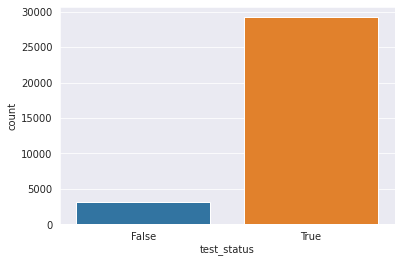

In [ ]:
sns.countplot(x="test_status", data=df3)

So most got sent to testing, but not all got tested at the time this dataset got created. 

## Production Volume % Tested:  43723/48567= 0.9002614944303745 = 90%

# Operational Efficiency 
Look at time from creation to test. See what the mean is as baseline. Then if there is left skew, look at what caused smaller time intervals. And optimize process for that.

In [ ]:
df3['created_ts'] =  pd.to_datetime(df3['created_ts'],
                              format='%Y-%m-%d %H:%M:%S')

In [ ]:
df3['test_ts'] =  pd.to_datetime(df3['test_ts'],
                              format='%Y-%m-%d %H:%M:%S')

In [ ]:
df3['time_diff'] = df3['test_ts'] - df3['created_ts']

In [ ]:
df3.head()

,Unnamed: 0_x,uid,widget_type,created_ts,Unnamed: 0_y,test_ts,test_status,time_diff
0,0,3fc760e3-afc7-4f3b-8b17-813de9ac3e7e,A,2018-06-01 06:05:49,0,2018-06-01 06:08:11,True,0 days 00:02:22
1,1,86ba8559-fb1c-4178-b835-1dc8ad8be2a1,A,2018-06-01 06:11:47,1,2018-06-01 06:13:41,True,0 days 00:01:54
2,2,76131121-b9ba-4d17-a600-374d5b46414a,A,2018-06-01 06:17:32,2,2018-06-01 06:19:43,True,0 days 00:02:11
3,3,b74b4756-8837-450c-9dc1-d4a7d78e01ea,A,2018-06-01 06:23:36,3,2018-06-01 06:25:40,True,0 days 00:02:04
4,4,d54e5b6b-1bcd-4c23-95c5-f5743497f1a3,A,2018-06-01 06:29:30,4,2018-06-01 06:31:21,True,0 days 00:01:51


In [ ]:
df3['time_diff'] = df3['time_diff'].astype(int)/ 10**9 #number of seconds to the unix epoch start (1970-01-01 00:00:00)

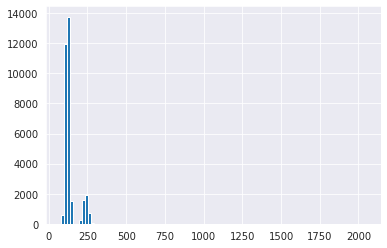

In [ ]:
df3['time_diff'].hist(bins = 100)

In [ ]:
df3['time_diff'].value_counts()

119.0    1101
121.0    1014
122.0    1009
120.0     981
124.0     971
         ... 
157.0       1
194.0       1
187.0       1
195.0       1
193.0       1
Name: time_diff, Length: 189, dtype: int64

We can see here that most of the lag between creation and tested is 119 seconds or around 2 minutes. At the same time there are some values that are less that. These would be the target values to optimize production on.   

________________________________________________________________________________

# *Below is data pipeline used to analyze numerical and categorical variables as well as any associations between them.*

# For zip files.

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest.zip

--2020-11-23 23:15:49--  http://files.grouplens.org/datasets/movielens/ml-latest.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277113433 (264M) [application/zip]
Saving to: ‘ml-latest.zip.1’

ml-latest.zip.1     100%[===================>] 264.28M  16.9MB/s    in 17s     

2020-11-23 23:16:07 (15.7 MB/s) - ‘ml-latest.zip.1’ saved [277113433/277113433]



In [ ]:
!unzip ml-latest.zip

Archive:  ml-latest.zip
replace ml-latest/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

In [ ]:
df2 = pd.read_csv('ml-latest/ratings.csv')
df2.head()

# EDA Pipeline

## Numerical Variables

For numerical features, we are always concerned about the distribution of these features, including the statistical characteristics of these columns e.g mean, median, mode. Hence we will usually use Distribution plot to visualize their data distribution. Boxplots are also commonly used to unearth the statistical characteristics of each feature. More often than not, we use it to look for any outliers that we might need to filter out later on.

In [ ]:
numeric_ = df.select_dtypes(exclude=['object']).copy()
numeric_.columns

In [ ]:
disc_num = ['Postal Code', 'Row ID']

In [ ]:
cont_num = []
for i in numeric_.columns:
    if i not in disc_num:
        cont_num.append(i)

In [ ]:
cat = df.select_dtypes(include=['object']).copy()
cat.columns

In [ ]:
#Continuous Variables

fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

Variables with mostly or 1 as their value:

1. Customers
2. Number of Records
2. Profit

INFORMATIVE? 
These are not the most informative, but good to note thier lack of variance.

SKEWNESS? 
Also, there is some skew in Quantity.

In [ ]:
#Continuous Variables

fig = plt.figure(figsize=(14,15))

for index,col in enumerate(cont_num):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

A lot of 0's and near 0 values in Profit and Sales.

Skewness in upper region.

Most normal looking distribution is Profit.

In [ ]:
#Discrete Number

sns.countplot(x='Postal Code', data=df)

In [ ]:
# Discrete Variables

# sns.countplot(x='Row ID', data=df)

# Categorical Variables

In the case of categorical features, we will often use countplots to visualize the count of each distinct value within each features. We can see that categorical feature Country/Region consist of mainly one value, which is not very useful information.

In [ ]:
list(cat)

In [ ]:
sns.countplot(x="Category", data=cat)

In [ ]:
sns.countplot(x="City", data=cat)

In [ ]:
sns.countplot(x="Country/Region", data=cat)

In [ ]:
sns.countplot(x="Product Name", data=cat)

In [ ]:
sns.countplot(x="Region", data=cat)

In [ ]:
sns.countplot(x="Segment", data=cat)

In [ ]:
sns.countplot(x="Ship Mode", data=cat)

In [ ]:
sns.countplot(x="State", data=cat)

In [ ]:
sns.countplot(x="Sub-Category", data=cat)

Univariate Analysis helps us to understand all the features better, on an individual scale. To further deepen our insights and uncover potential pattern in the data, we will also need to find out more about the relationship between all these features with one another, which brings us to our next step in our analysis - Bivariate Analysis

# Bi-Variate Analysis

Bi-variate analysis looks at 2 different features to identify any possible relationship or distinctive patterns between the 2 features. One of the commonly used technique is through the Correlation Matrix. Correlation matrix is an effective tool to uncover linear relationship (Correlation) between any 2 continuous features. Correlation not only allow us to determine which features are important to Sales, but also as a means to investigate any multicollinearity between our independent predictors.
Multicollinearity happens when 2 or more independent variables are highly correlated with one another. 

In [ ]:
sns.set(font_scale=1.1)
correlation_df = df.corr()
mask = np.triu(correlation_df.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_df,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

Highly correlated variables:

1. Sales and Profit
2. Quantity and Sales
3. Quantity and Profit

RECLASSIFY SIMILAR VARIABLES? At this point, can also determine similar variables that could be reclassified into one to avoid redundancy in dataset as well as possible multicollinearity.

## Identifying Relationship between Variables (Ind and Dep (Sales))

INFORMING BUSINESS STRATEGY:

Below, we sorted the strength of linear relationship between Sales and other variables. Overall, Profit and Quantity have the strongest linear relationship with Sales.

In [ ]:
numeric_ = df.select_dtypes(exclude=['object'])
correlation = numeric_.corr()
correlation[['Sales']].sort_values(['Sales'], ascending=False)

## Scatterplots
Using scatterplot can also help us to identify potential linear relationship between Numerical features. Although scatterplot does not provide quantitative evidence on the strength of linear relationship between our features, it is useful in helping us to visualize any sort of relationship that correlation matrix could not calculate. E.g Quadratic, Exponential relationships.

In [ ]:
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_.iloc[:,index], y='Sales', data=numeric_.dropna())
fig.tight_layout(pad=1.0)